# Lab 4 - Polynomial Interpolation (Lagrange and Newton)
## February 20 - February 22, 2023
## Student 1 Name: Aditya Tanna Student 1 ID No. 202103023
## Student 2 Name: Kanishk Dad Student 2 ID No. 202103005
## Student 3 Name: Vraj Thakkar Student 3 ID No. 202103053
## Date of Submission: 22/02/2023
***

In [221]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as smp

### Q.1 Write a function `mypolyint` that takes in a $n \times 2$ matrix whose row $i$ contains points $(x_i,y_i)$, and returns coefficients of the polynomial that interpolates the given points, using Lagrange's interpolation. Your function should also plot the graph of the function showing that it does interpolate the given set of points.

In [234]:
def mypolyint(points):
    n = len(points)
    x = points[:,0]
    y = points[:,1]
    coefficients = np.zeros(n) #making an array of size n full of zeros 
    for i in range(n):
        numerator = np.poly1d([1]) #defining a polynomial of degree one
        denominator = 1 #initializing as one and then updating the value according to our convenience 
        for j in range(n):
            if i != j: #condition for lagrange's interpolation
                numerator *= np.poly1d([1, -x[j]])
                denominator *= (x[i] - x[j])
        coefficients += y[i] * (numerator / denominator)
    p = np.poly1d(coefficients) #defining the polynomial function for the coefficients that we get from the Lagrange's interpolation method
    plt.plot(x, y, 'o', label='Given data points')
    xp = np.linspace(min(x), max(x), 1000) #taking between the minimum and maximum of x
    plt.plot(xp, p(xp), label='Interpolated function')
    plt.legend()
    plt.grid() #using a grid to better visualise the graph
    plt.show()
    return np.flip(coefficients)  #reversing the array of the coefficients
   

### Q.1(a) Show a few example plots of points $(x_i,y_i),i=1,\ldots,n$ and the interpolating polynomial graph passing through the given points, below

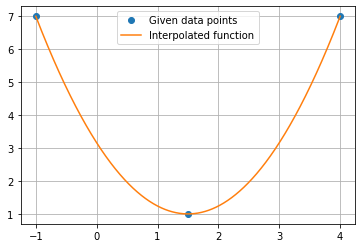

[ 3.16 -2.88  0.96]


In [235]:
### Generate examples of (x_i,y_i) and plot these points along with values of the interpolating polynomials at 
### these (and several intermediate points).
points = np.array([[-1,7],[1.5,1],[4,7]])
coeffs = mypolyint(points)
print(coeffs)


***
### Q.2: Write a function `mynewtonint` that takes in an $n \times 2$ matrix whose row $i$ contains points $(x_i,y_i)$, and returns coefficient vector of the Newton's polynomial that interpolates the given points. Your function should also plot the graph of the polynomial (at given and several intermediate points) showing that it does interpolate the given set of points.


[ 1.50000000e+01  2.90000000e+01 -3.30000000e+01  9.26666667e+00
 -2.10833333e+00  8.92857143e-02  6.36408730e-02 -2.45535714e-02
  3.01173942e-02  1.67465829e-02]


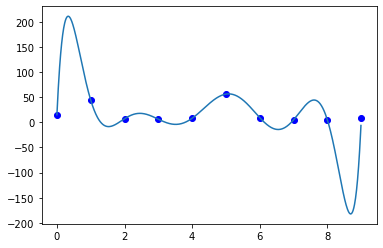

In [238]:
x = [0,1,2,5,4,7,8,9,6,3]
y = [15,44,7,56,8,5,4,8,9,6]

z = smp.symbols("z")
n= len(x)-1

a = [y[0]]
a_1 = (y[0] - y[1])/(x[0] - x[1])
a = np.append(a,a_1)

def x_conti(n, i):
    term = 1
    for j in range(i):
        term = term*( x[n] - x[j])

    return term


def kanishk(n,A):
    p_x = 0
    for i in range(A):
        p_x += a[i]*(x_conti(n,i))
    return p_x
    

for i in range(n+1):
    if i < 2:
        continue
    a_i = (y[i] - kanishk(i,i))/(x_conti(i,i))
    a = np.append(a,a_i)

print (a)

n = n+1
def variable(z):
    
    ans= 0
    # array_of_x_variables = []
    for k in range(n):
        last = 1
    
        for i in range(k):
            
            last = last*(z-x[i])
            # print(last)
            #array_of_x_variables= np.append(array_of_x_variables,last)
        ans += a[k]*last
    return ans



x_new = np.arange(0, 9, .01)
y_new = variable(x_new)


plt.plot(x,y,'bo')
plt.plot(x_new,y_new)
plt.show()


### Q.2(a) Show a few example plots of points $(x_i,y_i),i=1,\ldots,n$ and the interpolating polynomial graph passing through the given points, below


In [239]:
### Write your examples for Q.2 here.
## the example points for x and y are given below

x = [0,-1,1,2,6,7]
y = [1,2,3,4,5,6]




***
### Q.3 For the function $f(x) = \sqrt{x}$, let $f_n(x)$ denote the Newton's polynomial constructed by interpolating $n+1$ equi-spaced sampled points from the interval $[0,4]$. Plot the functions $f,f_2,f_4,f_8,f_{16},f_{32}$, and in another figure plot the error function $e(x) = f(x)-f_n(x)$ by sampling the error function on $1000$ equi-spaced points in the interval $[0,4]$. Find the maximum error $E_n = \max_{1\leq k \leq 1000} \{|f(x_k) - f_n(x_k)|\}$, and plot it with respect to $n$. Record your observations.


32
[ 0.00000000e+00 -0.00000000e+00  1.18481605e+01 -5.16687935e+01
  1.39455876e+02 -2.79214309e+02  4.47106471e+02 -5.97875480e+02
  6.86982665e+02 -6.92335423e+02  6.21514870e+02 -5.03072128e+02
  3.70777179e+02 -2.50849693e+02  1.56849023e+02 -9.11654859e+01
  4.95024023e+01 -2.52207184e+01  1.21027568e+01 -5.48881260e+00
  2.35968025e+00 -9.64246570e-01  3.75446833e-01 -1.39604989e-01
  4.96737440e-02 -1.69446571e-02  5.55083849e-03 -1.74897436e-03
  5.30795105e-04 -1.55360874e-04  4.39022315e-05 -1.19853399e-05
  3.16031971e-06]


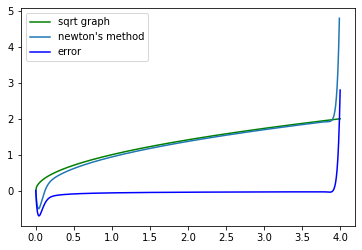

In [241]:
## Write your code for Q.3 here

# kindly enter different values i.e. 2 , 4 , 8 , 16 , 32 and the graph that returns are of squareroot, newton polynomial, and error.

n = int(input())

xs = np.linspace(0,4,400)
ys = [np.sqrt(x) for x in xs]
plt.plot(xs,ys,'g',label ='sqrt graph')

def function_x_points(n):
   a = 4/(n+1)
   x_points = 0
   x = [0]
   for i in range(n):

    x_points = x_points + a
    x = np.append(x, x_points)
   y=[0]
   for i in range(len(x)):
    y_points = math.sqrt(x[i])
    y = np.append(y, y_points)

   return x,y

x,y = function_x_points(n)


# import useful libraries
# x = [0, 2,-4,1,-1]
# y = [-7,1,2,-8,-8]


z = smp.symbols("z")
n = len(x)-1

a = [y[0]]
a_1 = (y[0] - y[1])/(x[0] - x[1])
a = np.append(a, a_1)


def x_conti(n, i):
    term = 1
    for j in range(i):
        term = term*(x[n] - x[j])

    return term


def kanishk(n, A):
    p_x = 0
    for i in range(A):
        p_x += a[i]*(x_conti(n, i))
    return p_x


for i in range(n+1):
    if i < 2:
        continue
    a_i = (y[i] - kanishk(i, i))/(x_conti(i, i))
    a = np.append(a, a_i)

print(a)

n = n+1
def variable(z):

    ans = 0
    # array_of_x_variables = []
    for k in range(n):
        last = 1
        for i in range(k):
            last = last*(z-x[i])
            # print(last)
            # array_of_x_variables= np.append(array_of_x_variables,last)
        ans += a[k]*last
    return ans

# o = variable(float(7))
# print(o)
x_new = np.arange(0,4, .01)
y_new = variable(x_new)

plt.plot(x_new, y_new, label = "newton's method")
v = y_new - ys
plt.plot(xs, v, 'b', label = "error")
plt.legend()
plt.show()




### <font color="red"> Ans 3. Write your observations here <font>
<font color="black"> For f_2 the grph is similar to quadratic but the errror is maximum inn range 1 to 2 and also o at some point between 3 to 3.5.
<font color="black"> For f_4 the graph is very much different than the graph of squareroot and error is maximum between 0 to 1.
<font color="black"> For f_8 error is maximum between 0 to 0.5.and graph is similar to root afterwards.
<font color="black"> For f_16 error is maximum between 0 to 0.5.and graph is similar to root afterwards.similar for f_32.

